In [76]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# –ù–∞—á–Ω—ë–º —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ–± –∏–≥—Ä–æ–∫–∞—Ö

In [77]:
data_players = pd.read_csv("C:/Users/artsa/Downloads/top5-players.csv")

In [78]:
data_players.head()

Rk             Player   Nation    Pos           Squad                Comp  \
0   1         Max Aarons  eng ENG     DF     Bournemouth  eng Premier League   
1   2   Brenden Aaronson   us USA  MF,FW    Union Berlin       de Bundesliga   
2   3    Paxten Aaronson   us USA     MF  Eint Frankfurt       de Bundesliga   
3   4  Keyliane Abdallah   fr FRA     FW       Marseille          fr Ligue 1   
4   5   Yunis Abdelhamid   ma MAR     DF           Reims          fr Ligue 1   

    Age    Born  MP  Starts   Min   90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  \
0  23.0  2000.0  20      13  1237  13.7    0    1    1     0   0      0     1   
1  22.0  2000.0  30      14  1267  14.1    2    2    4     2   0      0     3   
2  19.0  2003.0   7       1   101   1.1    0    1    1     0   0      0     0   
3  17.0  2006.0   1       0     4   0.0    0    0    0     0   0      0     0   
4  35.0  1987.0  31      31  2781  30.9    4    0    4     3   1      1     5   

   CrdR   xG  npxG  xAG  npxG+xAG  PrgC   PrgP  PrgR  Gls_90  Ast_90  G+A_90  \
0     0  0.0   0.0  0.8       0.9  22.0   43.0  26.0    0.00    0.07    0.07   
1     1  2.0   2.0  1.9       3.8  37.0   56.0  91.0    0.14    0.14    0.28   
2     0  0.1   0.1  0.1       0.2   2.0    5.0   7.0    0.00    0.89    0.89   
3     0  0.0   0.0  0.0       0.0   0.0    0.0   0.0    0.00    0.00    0.00   
4     0  3.4   2.6  0.3       2.9  36.0  137.0   9.0    0.13    0.00    0.13   

   G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0     0.00       0.07   0.00    0.06       0.06     0.00         0.06  
1     0.14       0.28   0.14    0.13       0.27     0.14         0.27  
2     0.00       0.89   0.11    0.07       0.19     0.11         0.19  
3     0.00       0.00   0.00    0.00       0.00     0.00         0.00  
4     0.10       0.10   0.11    0.01       0.12     0.09         0.09

In [ ]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ NaN –∑–Ω–∞—á–µ–Ω–∏—è

In [79]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2852 non-null   int64  
 1   Player       2852 non-null   object 
 2   Nation       2849 non-null   object 
 3   Pos          2852 non-null   object 
 4   Squad        2852 non-null   object 
 5   Comp         2852 non-null   object 
 6   Age          2848 non-null   float64
 7   Born         2848 non-null   float64
 8   MP           2852 non-null   int64  
 9   Starts       2852 non-null   int64  
 10  Min          2852 non-null   int64  
 11  90s          2852 non-null   float64
 12  Gls          2852 non-null   int64  
 13  Ast          2852 non-null   int64  
 14  G+A          2852 non-null   int64  
 15  G-PK         2852 non-null   int64  
 16  PK           2852 non-null   int64  
 17  PKatt        2852 non-null   int64  
 18  CrdY         2852 non-null   int64  
 19  CrdR  

In [ ]:
# –û–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, —á—Ç–æ –µ—Å—Ç—å, –Ω–æ –∏—Ö –Ω–µ–º–Ω–æ–≥–æ, –º—ã –≤–ø–æ–ª–Ω–µ –º–æ–∂–µ–º –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –∏—Ö —Ç–æ—á–µ—á–Ω–æ

In [80]:
print(data_players[((data_players['Nation'].isna()) | (data_players['Age'].isna()) | (data_players['Born'].isna())  | (data_players['xG'].isna()))])

        Rk              Player  Nation    Pos        Squad           Comp  \
1395  1396   Mahmut K√ºc√ºksahin     NaN     MF     Augsburg  de Bundesliga   
1638  1639  Tommaso Martinelli  it ITA     GK   Fiorentina     it Serie A   
1784  1785       Max Moerstedt  de GER  DF,FW   Hoffenheim  de Bundesliga   
2074  2075    Marco Pellegrino     NaN     DF  Salernitana     it Serie A   
2075  2076    Marco Pellegrino     NaN     DF        Milan     it Serie A   
2529  2530        Max Svensson  es ESP     FW      Osasuna     es La Liga   

       Age    Born  MP  Starts  Min  90s  Gls  Ast  G+A  G-PK  PK  PKatt  \
1395  19.0  2004.0   1       0    1  0.0    0    0    0     0   0      0   
1638  17.0  2006.0   1       1   90  1.0    0    0    0     0   0      0   
1784   NaN     NaN   1       0   12  0.1    0    0    0     0   0      0   
2074   NaN     NaN  10       5  545  6.1    0    0    0     0   0      0   
2075   NaN     NaN   1       0   68  0.8    0    0    0     0   0      0   
25

In [ ]:
# –ü–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–∑ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞: Mahmut K√ºc√ºksahin - —Ç—É—Ä–æ–∫ (tr TUR), Marco Pellegrino - –∞—Ä–≥–µ–Ω—Ç–∏–Ω–µ—Ü (ar ARG), 2002 –≥–æ–¥–∞ —Ä–æ–∂–¥–µ–Ω–∏—è (22 –≥–æ–¥–∞), Max Moerstedt -
# 2006 –≥–æ–¥–∞ —Ä–æ–∂–¥–µ–Ω–∏—è (19 –ª–µ—Ç), Max Svensson - 2001 –≥–æ–¥–∞ —Ä–æ–∂–¥–µ–Ω–∏—è (23 –≥–æ–¥–∞), –∞ –≤–æ—Ç —É Tommaso Martinelli - –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ
# –Ω—ë–º –Ω–µ—Ç (–µ–º—É —Ç–æ–ª—å–∫–æ 19) –∏ —Å—ã–≥—Ä–∞–ª –æ–Ω —Ç–æ–ª—å–∫–æ 1 –º–∞—Ç—á, –ø–æ—ç—Ç–æ–º—É —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ –∑–∞–º–µ–Ω–∏—Ç—å —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –Ω—É–ª–∏

In [81]:
data_players.loc[data_players['Rk'] == 1396, 'Nation'] = 'tr TUR'
data_players.loc[(data_players['Rk'] == 2075) | (data_players['Rk'] == 2076), 'Nation'] = 'ar ARG'
data_players.loc[data_players['Rk'] == 1785, ['Age', 'Born']] = [22, 2002]
data_players.loc[data_players['Rk'] == 2075, ['Age', 'Born']] = [19, 2006]
data_players.loc[data_players['Rk'] == 2076, ['Age', 'Born']] = [19, 2006]
data_players.loc[data_players['Rk'] == 2530, ['Age', 'Born']] = [23, 2001]

In [82]:
data_players.fillna(value=0, inplace=True)

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∏–º:

In [83]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2852 non-null   int64  
 1   Player       2852 non-null   object 
 2   Nation       2852 non-null   object 
 3   Pos          2852 non-null   object 
 4   Squad        2852 non-null   object 
 5   Comp         2852 non-null   object 
 6   Age          2852 non-null   float64
 7   Born         2852 non-null   float64
 8   MP           2852 non-null   int64  
 9   Starts       2852 non-null   int64  
 10  Min          2852 non-null   int64  
 11  90s          2852 non-null   float64
 12  Gls          2852 non-null   int64  
 13  Ast          2852 non-null   int64  
 14  G+A          2852 non-null   int64  
 15  G-PK         2852 non-null   int64  
 16  PK           2852 non-null   int64  
 17  PKatt        2852 non-null   int64  
 18  CrdY         2852 non-null   int64  
 19  CrdR  

In [ ]:
# –ü–µ—Ä–µ–π–¥—ë–º –∫–æ –≤—Ç–æ—Ä–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É

In [84]:
data_teams = pd.read_csv("C:/Users/artsa/Downloads/Team_result.csv")

In [85]:
data_teams.head()

id              League             Team           Team_Rus  Plays  Wins  \
0   1  eng Premier League  Manchester City     –ú–∞–Ω—á–µ—Å—Ç–µ—Ä –°–∏—Ç–∏     38    28   
1   2  eng Premier League          Arsenal            –ê—Ä—Å–µ–Ω–∞–ª     38    28   
2   3  eng Premier League        Liverpool          –õ–∏–≤–µ—Ä–ø—É–ª—å     38    24   
3   4  eng Premier League      Aston Villa        –ê—Å—Ç–æ–Ω –í–∏–ª–ª–∞     38    20   
4   5  eng Premier League        Tottenham  –¢–æ—Ç—Ç–µ–Ω—Ö—ç–º –•–æ—Ç—Å–ø—É—Ä     38    20   

   Draws  Falls  Goals  Miss goals Different  Score  Rank  
0      7      3     96          34        62     91     1  
1      5      5     91          29        62     89     2  
2     10      4     86          41        45     82     3  
3      8     10     76          61        15     68     4  
4      6     12     74          61        13     66     5

In [ ]:
# –ì–∏–ø–æ—Ç–µ–∑–∞ 1: —á–µ–º –±–æ–ª—å—à–µ –∏–≥—Ä–æ–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –≤—ã—Å—Ç—É–ø–∏–ª–∏ –ª—É—á—à–µ –æ–∂–∏–¥–∞–µ–º–æ–≥–æ, —Ç–µ–º –≤—ã—à–µ —ç—Ç–∞ –∫–æ–º–∞–Ω–¥–∞ –≤ —Ç–∞–±–ª–∏—Ü–µ –ª–∏–¥–µ—Ä–æ–≤
# –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Å—Ä–∞–≤–Ω–∏—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ Gls (—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∑–∞–±–∏—Ç—ã–µ –º—è—á–∏) –∏ xG (–º–µ—Ç—Ä–∏–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –≥–æ–ª–æ–≤ –æ–∂–∏–¥–∞–ª–æ—Å—å –æ—Ç –∏–≥—Ä–æ–∫–∞)
# P.S xG —É—á–∏—Ç—ã–≤–∞–µ—Ç —Å–æ–∑–¥–∞–Ω–Ω—ã–µ –∏–≥—Ä–æ–∫–∞–º–∏ –æ–ø–∞—Å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã, —É–¥–∞—Ä—ã –ø–æ –≤–æ—Ä–æ—Ç–∞–º –∏ —Ç–¥, —ç—Ç–æ –Ω–µ–∫–æ–µ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ –æ—Ç –∏–≥—Ä–æ–∫–∞

In [ ]:
# –ß—Ç–æ–±—ã —É—á–∏—Ç—ã–≤–∞—Ç—å –µ—â—ë –∏ –∞—Å—Å–∏—Å—Ç—ã, –±—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å—É–º–º—É Gls+A-PK —Å npxG+xAG, —Ç–æ –µ—Å—Ç—å —Å—É–º–º—É –æ–∂–∏–¥–∞–µ–º—ã—Ö –≥–æ–ª–æ–≤ –∏ –∞—Å—Å–∏—Å—Ç–æ–≤ –±–µ–∑ —É—á—ë—Ç–∞ –ø–µ–Ω–∞–ª—å—Ç–∏
# –î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü is_better, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ True, –µ—Å–ª–∏ Gls-PK+A > npxG+xAG –∏ false –µ—Å–ª–∏ –Ω–µ—Ç

In [86]:
data_players['is_better'] = data_players['G+A'] - data_players['PK'] > data_players['npxG+xAG']

In [ ]:
# –î–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É data_team —Å—Ç–æ–ª–±–µ—Ü, –≤ –∫–æ—Ç–æ—Ä–æ–º –±—É–¥–µ—Ç —Ö—Ä–∞–Ω–∏—Ç—å—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—è–≤–∏–≤—à–∏—Ö —Å–µ–±—è –∏–≥—Ä–æ–∫–æ–≤ –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫ –≤ –∫–æ–º–∞–Ω–¥–µ
# (–ø–æ–ª—É—á–∏—Ç—Å—è –Ω–µ–∫–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–ª—è –∏–≥—Ä–æ–∫–∞ —Å—ã–≥—Ä–∞—Ç—å –ª—É—á—à–µ –æ–∂–∏–¥–∞–Ω–∏–π)

In [87]:
data_players.rename(columns={'Squad':'Team'}, inplace=True)

In [88]:
best_players_per_team = data_players[data_players['is_better'] == True].groupby('Team').size()
total_players_per_team = data_players[data_players['Pos'] != "GK"].groupby('Team').size()
ratio_best_to_total = best_players_per_team.divide(total_players_per_team).reset_index(name='p_better')
data_teams = data_teams.merge(ratio_best_to_total, how='left', on='Team')

In [89]:
data_teams.head()

id              League             Team           Team_Rus  Plays  Wins  \
0   1  eng Premier League  Manchester City     –ú–∞–Ω—á–µ—Å—Ç–µ—Ä –°–∏—Ç–∏     38    28   
1   2  eng Premier League          Arsenal            –ê—Ä—Å–µ–Ω–∞–ª     38    28   
2   3  eng Premier League        Liverpool          –õ–∏–≤–µ—Ä–ø—É–ª—å     38    24   
3   4  eng Premier League      Aston Villa        –ê—Å—Ç–æ–Ω –í–∏–ª–ª–∞     38    20   
4   5  eng Premier League        Tottenham  –¢–æ—Ç—Ç–µ–Ω—Ö—ç–º –•–æ—Ç—Å–ø—É—Ä     38    20   

   Draws  Falls  Goals  Miss goals Different  Score  Rank  p_better  
0      7      3     96          34        62     91     1  0.391304  
1      5      5     91          29        62     89     2  0.434783  
2     10      4     86          41        45     82     3  0.250000  
3      8     10     76          61        15     68     4  0.379310  
4      6     12     74          61        13     66     5  0.392857

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫

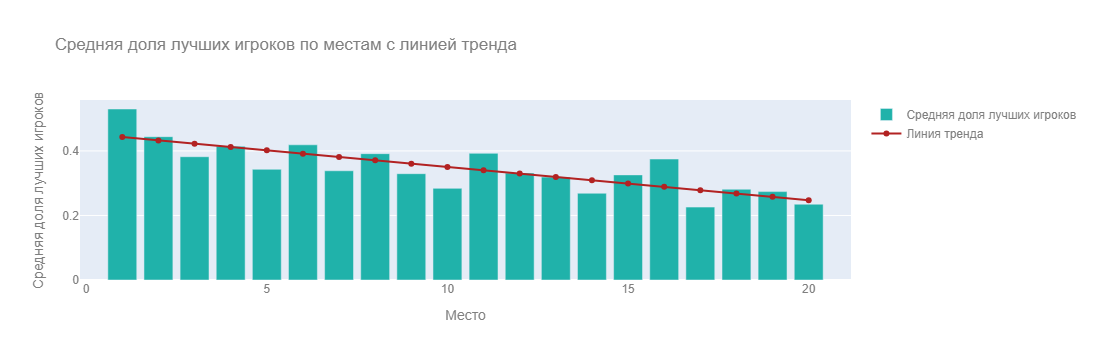

In [90]:
average_per_rank = data_teams.groupby('Rank')['p_better'].mean().reset_index()
slope, intercept, r_value, p_value, std_err = linregress(average_per_rank['Rank'], average_per_rank['p_better'])
line_x = average_per_rank['Rank']
line_y = slope * line_x + intercept
fig = go.Figure()
fig.add_trace(go.Bar(
    x=average_per_rank['Rank'],
    y=average_per_rank['p_better'],
    marker_color='lightseagreen',
    name='–°—Ä–µ–¥–Ω—è—è –¥–æ–ª—è –ª—É—á—à–∏—Ö –∏–≥—Ä–æ–∫–æ–≤'
))
fig.add_trace(go.Scatter(
    x=line_x,
    y=line_y,
    mode='lines+markers',
    line=dict(color='firebrick'),
    name='–õ–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞'
))
fig.update_layout(
    title='–°—Ä–µ–¥–Ω—è—è –¥–æ–ª—è –ª—É—á—à–∏—Ö –∏–≥—Ä–æ–∫–æ–≤ –ø–æ –º–µ—Å—Ç–∞–º —Å –ª–∏–Ω–∏–µ–π —Ç—Ä–µ–Ω–¥–∞',
    xaxis_title='–ú–µ—Å—Ç–æ',
    yaxis_title='–°—Ä–µ–¥–Ω—è—è –¥–æ–ª—è –ª—É—á—à–∏—Ö –∏–≥—Ä–æ–∫–æ–≤',
    width=700,
    font=dict(family="Arial", size=12, color="#7f7f7f"),
    showlegend=True
)
fig.show()

In [91]:
X = np.array(average_per_rank['p_better'])
Y = np.array(average_per_rank['Rank'])
n = len(X)

X_mean = np.mean(X)
Y_mean = np.mean(Y)

Sxy = np.sum((X - X_mean) * (Y - Y_mean))
Sxx = np.sum((X - X_mean)**2)
Syy = np.sum((Y - Y_mean)**2)

slope = Sxy / Sxx
intercept = Y_mean - slope * X_mean
r = Sxy / np.sqrt(Sxx * Syy)

t_stat = r * np.sqrt((n - 2) / (1 - r**2))
df = n - 2
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"–°—Ä–µ–¥–Ω–∏–µ: XÃÑ={X_mean:.4f}, YÃÑ={Y_mean:.4f}")
print(f"Sxy={Sxy:.4f}, Sxx={Sxx:.4f}, Syy={Syy:.4f}")
print(f"slope={slope:.4f}, intercept={intercept:.4f}")
print(f"r={r:.4f}")
print(f"t-stat={t_stat:.4f}, p-value={p_value:.5f}")

if slope < 0 and p_value < 0.05:
    print("‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è: —á–µ–º –±–æ–ª—å—à–µ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä–æ–∫–æ–≤, —Ç–µ–º –≤—ã—à–µ –∫–æ–º–∞–Ω–¥–∞ –≤ —Ç–∞–±–ª–∏—Ü–µ.")
else:
    print("‚ùå –ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è.")

–°—Ä–µ–¥–Ω–∏–µ: XÃÑ=0.3452, YÃÑ=10.5000
Sxy=-6.8421, Sxx=0.1074, Syy=665.0000
slope=-63.6830, intercept=32.4816
r=-0.8095
t-stat=-5.8488, p-value=0.00002
‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è: —á–µ–º –±–æ–ª—å—à–µ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä–æ–∫–æ–≤, —Ç–µ–º –≤—ã—à–µ –∫–æ–º–∞–Ω–¥–∞ –≤ —Ç–∞–±–ª–∏—Ü–µ.


In [ ]:
# –í—ã–≤–æ–¥: –≤ —Ç–æ–ø–æ–≤—ã—Ö –∫–ª—É–±–∞—Ö, –∏–≥—Ä–æ–∫–∏ –∑–∞—á–∞—Å—Ç—É—é –ø—Ä–æ—è–≤–ª—è—é—Ç —Å–µ–±—è –≤—ã—à–µ –æ–∂–∏–¥–∞–Ω–∏–π. –ü–æ—ç—Ç–æ–º—É —Ç—Ä–µ–Ω–µ—Ä—É —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Ö –∏–≥—Ä–æ–∫–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∞—è
# —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤—ã—à–µ —Ä–∞—Å—á—ë—Ç–Ω–æ–π

In [ ]:
# –ì–∏–ø–æ—Ç–µ–∑–∞ 2: –≤ —Å–∏–ª—å–Ω—ã—Ö –∫–æ–º–∞–Ω–¥–∞—Ö, –º—è—á–∏ –∑–∞–±–∏–≤–∞—é—Ç –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –Ω–∞–ø–∞–¥–∞—é—â–∏–µ, –∞ –≤ —Å–ª–∞–±—ã—Ö - –∫–∞–∫ –ø—Ä–∏–¥—ë—Ç—Å—è.
# –≠—Ç–∞ –≥–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–º–æ–≥–∞–µ—Ç –ø–æ–Ω—è—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å —Ç–∞–∫—Ç–∏–∫–∏ –≤ –∏–≥—Ä–µ –∫–æ–º–∞–Ω–¥: —Å–æ–±–ª—é–¥–∞–µ—Ç—Å—è –ª–∏ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∞—è —Ç–∞–∫—Ç–∏–∫–∞: –∑–∞—â–∏—Ç–Ω–∏–∫–∏ (–≤—ã–Ω–æ—Å) -> –ø–æ–ª—É–∑–∞—â–∏—Ç–Ω–∏–∫–∏ (–∞—Å—Å–∏—Å—Ç) -> 
# -> –Ω–∞–ø–∞–¥–∞—é—â–∏–µ (–≥–æ–ª). –ö–∞–∫ –Ω–∞—Ä—É—à–µ–Ω–∏–µ —ç—Ç–æ–π —Å—Ö–µ–º—ã –æ—Ç—Ä–∞–∑–∏—Ç—Å—è –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –∫–æ–º–∞–Ω–¥—ã

In [92]:
data_players['Pos'].unique()

array(['DF', 'MF,FW', 'MF', 'FW', 'FW,MF', 'DF,FW', 'GK', 'DF,MF',
       'MF,DF', 'FW,DF'], dtype=object)

In [ ]:
# –ò–∑–±–∞–≤–∏–º—Å—è –æ—Ç –ø–æ–≤—Ç–æ—Ä–æ–≤

In [93]:
def normalize_position(pos):
    parts = sorted([p.strip() for p in pos.split(',')])
    return ', '.join(parts)
data_players['Pos'] = data_players['Pos'].apply(normalize_position)
positions_list = data_players['Pos'].unique()
print(positions_list)

['DF' 'FW, MF' 'MF' 'FW' 'DF, FW' 'GK' 'DF, MF']


In [ ]:
# –ó–¥–µ—Å—å DF - –∑–∞—â–∏—Ç–Ω–∏–∫, MF - –ø–æ–ª—É–∑–∞—â–∏—Ç–Ω–∏–∫, FW - –Ω–∞–ø–∞–¥–∞—é—â–∏–π, –æ—Å—Ç–∞–ª—å–Ω—ã–µ - –≥–∏–±—Ä–∏–¥—ã. –ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –µ—Å–ª–∏ —É –∏–≥—Ä–æ–∫–∞ –≤ –ø–æ–∑–∏—Ü–∏–∏ –µ—Å—Ç—å —á–∞—Å—Ç—å FW, —Ç–æ –µ–≥–æ –≥–æ–ª—ã –Ω–µ
# –±—É–¥—É—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –Ω–∞—Ä—É—à–µ–Ω–∏–µ–º —Ç–∞–∫—Ç–∏–∫–∏. –ü–æ—Å—á–∏—Ç–∞–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç –º—è—á–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞–±–∏–ª–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–π –ø–æ–∑–∏—Ü–∏–∏

In [94]:
for pos in positions_list:
    players_at_pos = data_players[data_players['Pos'] == pos]
    goals_by_pos = players_at_pos.groupby('Team')['G-PK'].sum()
    total_goals_by_team = data_players.groupby('Team')['G-PK'].sum()
    percentage_by_team = goals_by_pos.divide(total_goals_by_team, fill_value=0)
    column_name = f'{pos}_Percentage'
    data_teams[column_name] = data_teams['Team'].map(percentage_by_team)

In [95]:
data_teams.head()

id              League             Team           Team_Rus  Plays  Wins  \
0   1  eng Premier League  Manchester City     –ú–∞–Ω—á–µ—Å—Ç–µ—Ä –°–∏—Ç–∏     38    28   
1   2  eng Premier League          Arsenal            –ê—Ä—Å–µ–Ω–∞–ª     38    28   
2   3  eng Premier League        Liverpool          –õ–∏–≤–µ—Ä–ø—É–ª—å     38    24   
3   4  eng Premier League      Aston Villa        –ê—Å—Ç–æ–Ω –í–∏–ª–ª–∞     38    20   
4   5  eng Premier League        Tottenham  –¢–æ—Ç—Ç–µ–Ω—Ö—ç–º –•–æ—Ç—Å–ø—É—Ä     38    20   

   Draws  Falls  Goals  Miss goals Different  Score  Rank  p_better  \
0      7      3     96          34        62     91     1  0.391304   
1      5      5     91          29        62     89     2  0.434783   
2     10      4     86          41        45     82     3  0.250000   
3      8     10     76          61        15     68     4  0.379310   
4      6     12     74          61        13     66     5  0.392857   

   DF_Percentage  FW, MF_Percentage  MF_Percentage  FW_Percentage  \
0       0.070588           0.482353       0.152941       0.235294   
1       0.184211           0.315789       0.171053       0.328947   
2       0.148649           0.148649       0.135135       0.567568   
3       0.117647           0.514706       0.088235       0.279412   
4       0.223881           0.119403       0.149254       0.507463   

   DF, FW_Percentage  GK_Percentage  DF, MF_Percentage  
0                0.0            0.0           0.058824  
1                0.0            0.0           0.000000  
2                0.0            0.0           0.000000  
3                0.0            0.0           0.000000  
4                0.0            0.0           0.000000

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ

In [96]:
data_teams.columns

Index(['id', 'League', 'Team', 'Team_Rus', 'Plays', 'Wins', 'Draws', 'Falls',
       'Goals', 'Miss goals', 'Different', 'Score', 'Rank', 'p_better',
       'DF_Percentage', 'FW, MF_Percentage', 'MF_Percentage', 'FW_Percentage',
       'DF, FW_Percentage', 'GK_Percentage', 'DF, MF_Percentage'],
      dtype='object')

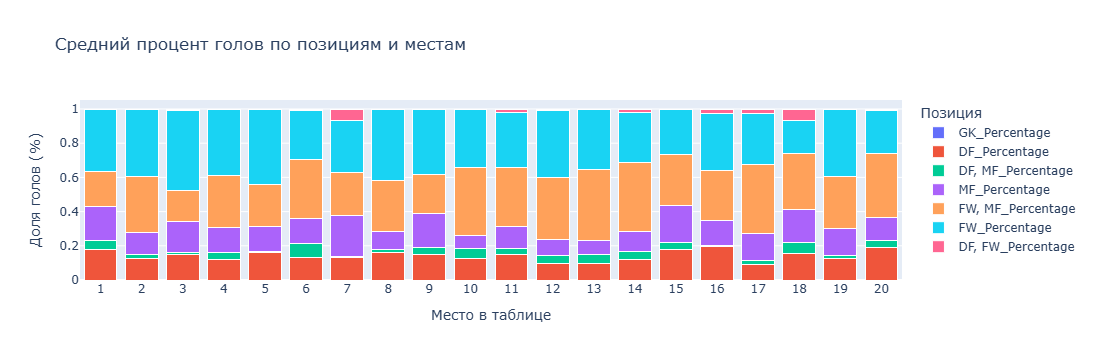

In [99]:
custom_order = ['GK_Percentage', 'DF_Percentage', 'DF, MF_Percentage', 'MF_Percentage', 'FW, MF_Percentage', 'FW_Percentage', 'DF, FW_Percentage']
position_cols = [col for col in custom_order if col in data_teams.columns]
agg_df = data_teams.groupby('Rank')[position_cols].mean().reset_index()
melted_df = pd.melt(
    agg_df, 
    id_vars='Rank', 
    value_vars=position_cols, 
    var_name='Position', 
    value_name='Percentage'
)
melted_df['Position'] = pd.Categorical(
    melted_df['Position'], 
    categories=custom_order, 
    ordered=True
)
melted_df = melted_df.sort_values(['Rank', 'Position'])
melted_df = melted_df.sort_values('Rank')
fig = px.bar(
    melted_df,
    x='Rank',
    y='Percentage',
    color='Position',
    title='–°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç –≥–æ–ª–æ–≤ –ø–æ –ø–æ–∑–∏—Ü–∏—è–º –∏ –º–µ—Å—Ç–∞–º',
    labels={'Rank': '–ú–µ—Å—Ç–æ', 'Percentage': '–î–æ–ª—è –≥–æ–ª–æ–≤ (%)'},
    category_orders={
        "Position": custom_order,
        "Rank": sorted(melted_df['Rank'].unique())
    },
    barmode='stack'
)
fig.update_xaxes(
    type='category',
    title_text='–ú–µ—Å—Ç–æ –≤ —Ç–∞–±–ª–∏—Ü–µ',
    categoryorder='array',
    categoryarray=sorted(melted_df['Rank'].unique())
)
fig.update_yaxes(title_text='–î–æ–ª—è –≥–æ–ª–æ–≤ (%)')
fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(
    legend_title='–ü–æ–∑–∏—Ü–∏—è',
    legend_traceorder='normal',
    xaxis={'tickmode': 'linear'}
)

fig.show()

In [98]:
agg_df.head()

Rank  GK_Percentage  DF_Percentage  DF, MF_Percentage  MF_Percentage  \
0     1            0.0       0.180577           0.053046       0.197016   
1     2            0.0       0.123727           0.026786       0.128886   
2     3            0.0       0.146623           0.013173       0.184142   
3     4            0.0       0.120973           0.041270       0.146714   
4     5            0.0       0.158919           0.006061       0.146867   

   FW, MF_Percentage  FW_Percentage  DF, FW_Percentage  
0           0.204436       0.364925           0.000000  
1           0.328076       0.389400           0.003125  
2           0.181828       0.463474           0.010761  
3           0.301417       0.385460           0.004167  
4           0.245396       0.442758           0.000000

In [102]:
X = np.array(agg_df['Rank'])
Y = np.array(agg_df['FW_Percentage'])
n = len(X)

X_mean = np.mean(X)
Y_mean = np.mean(Y)

Sxy = np.sum((X - X_mean) * (Y - Y_mean))
Sxx = np.sum((X - X_mean)**2)
Syy = np.sum((Y - Y_mean)**2)

slope = Sxy / Sxx
intercept = Y_mean - slope * X_mean
r = Sxy / np.sqrt(Sxx * Syy)

t_stat = r * np.sqrt((n - 2) / (1 - r**2))
df = n - 2
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("–†—É—á–Ω—ã–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è FW_Percentage:")
print(f"–°—Ä–µ–¥–Ω–∏–µ: XÃÑ={X_mean:.4f}, YÃÑ={Y_mean:.4f}")
print(f"Sxy={Sxy:.4f}, Sxx={Sxx:.4f}, Syy={Syy:.4f}")
print(f"slope={slope:.4f}, intercept={intercept:.4f}")
print(f"r={r:.4f}")
print(f"t-stat={t_stat:.4f}, p-value={p_value:.4f}")

if round(slope,1) < 0 and p_value < 0.05:
    print("‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è: —á–µ–º —Å–∏–ª—å–Ω–µ–µ –∫–æ–º–∞–Ω–¥–∞, —Ç–µ–º –±–æ–ª—å—à–µ –≥–æ–ª–æ–≤ –∑–∞–±–∏–≤–∞—é—Ç –Ω–∞–ø–∞–¥–∞—é—â–∏–µ.")
else:
    print("‚ùå –ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è: —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç.")

–†—É—á–Ω—ã–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è FW_Percentage:
–°—Ä–µ–¥–Ω–∏–µ: XÃÑ=10.5000, YÃÑ=0.3431
Sxy=-4.5747, Sxx=665.0000, Syy=0.0891
slope=-0.0069, intercept=0.4154
r=-0.5944
t-stat=-3.1362, p-value=0.0057
‚ùå –ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è: —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç.


In [ ]:
# –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è

In [ ]:
# –ì–∏–ø–æ—Ç–µ–∑–∞ 3: —Å—É—â–µ—Å—Ç–≤—É—é—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–∞–±–∏—Ç—ã–º–∏ –º—è—á–∞–º–∏ –∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º–∏ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏—è
# –£ –Ω–∞—Å –≤ —Ç–∞–±–ª–∏—Ü–µ –µ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è PrC, PrP, PrR - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–Ω–æ—Å–æ–≤, –ø–∞—Å–æ–≤ –∏ –ø—Ä–æ–±–µ–∂–µ–∫, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–¥–≤–∏–≥–∞–ª–∏ –∫–æ–º–∞–Ω–¥—É –≤–ø–µ—Ä—ë–¥. –ú—ã –¥–æ–±–∞–≤–∏–º –∫ —ç—Ç–∏–º
# —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ G-PK –∏ Ast, —á—Ç–æ–±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –æ–Ω–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π

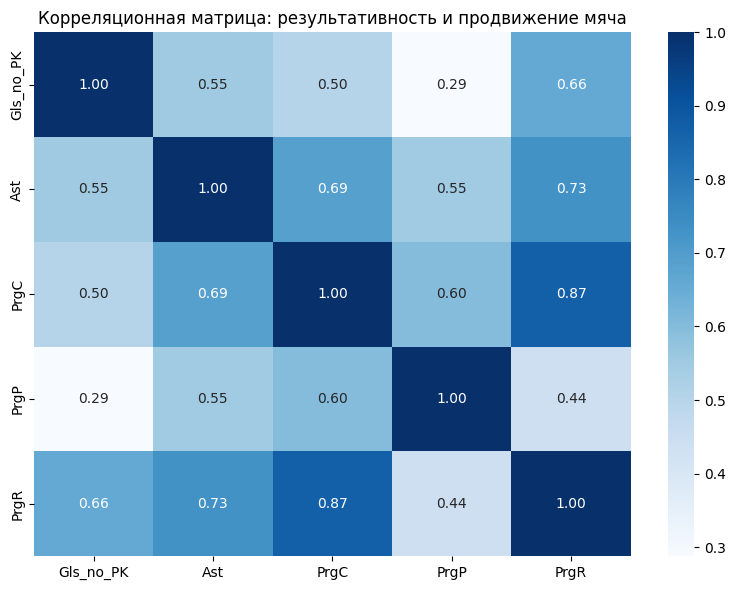

In [104]:
columns = ['Gls', 'PK', 'Ast', 'PrgC', 'PrgP', 'PrgR']
df_corr = data_players[columns].dropna()
df_corr['Gls_no_PK'] = df_corr['Gls'] - df_corr['PK']

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
corr_matrix = df_corr[['Gls_no_PK', 'Ast', 'PrgC', 'PrgP', 'PrgR']].corr()

# –ì—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞: —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ –º—è—á–∞")
plt.tight_layout()
plt.show()

In [106]:
correlation_results = {}
goal_eff = df_corr['Gls_no_PK']
ast = df_corr['Ast']

for var in ['PrgC', 'PrgP', 'PrgR']:
    r_goal, p_goal = pearsonr(goal_eff, df_corr[var])
    r_ast, p_ast = pearsonr(ast, df_corr[var])
    correlation_results[var] = {
        'r_goal': r_goal,
        'p_goal': p_goal,
        'r_ast': r_ast,
        'p_ast': p_ast
    }

correlation_df = pd.DataFrame(correlation_results).T
correlation_df.columns = [
    '–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Gls_no_PK', 'p-value Gls_no_PK',
    '–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Ast', 'p-value Ast'
]

alpha = 0.05
def is_significant(p):
    return "‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞" if p < alpha else "‚ùå –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞"

correlation_df["–ì–∏–ø–æ—Ç–µ–∑–∞ Gls_no_PK"] = correlation_df["p-value Gls_no_PK"].apply(is_significant)
correlation_df["–ì–∏–ø–æ—Ç–µ–∑–∞ Ast"] = correlation_df["p-value Ast"].apply(is_significant)

correlation_df

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Gls_no_PK  p-value Gls_no_PK  –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Ast    p-value Ast  \
PrgC              0.504227      8.336436e-184        0.691139   0.000000e+00   
PrgP              0.287740       1.694402e-55        0.547678  5.537069e-223   
PrgR              0.657851       0.000000e+00        0.730579   0.000000e+00   

     –ì–∏–ø–æ—Ç–µ–∑–∞ Gls_no_PK    –ì–∏–ø–æ—Ç–µ–∑–∞ Ast  
PrgC     ‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞  ‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞  
PrgP     ‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞  ‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞  
PrgR     ‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞  ‚úÖ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞

In [ ]:
# –ú–æ–∂–µ–º –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø—Ä–æ—Ö–æ–¥—ã –≤–ø–µ—Ä—ë–¥ –∏ –≤—ã–Ω–æ—Å—ã —Ö–æ—Ä–æ—à–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π. –û–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –≥–æ–ª–æ–≤, –∞—Å—Å–∏—Å—Ç–æ–≤ –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏—è:
# –í–∏–¥–∏–º, —á—Ç–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏—è —Å –∞—Å—Å–∏—Å—Ç–∞–º–∏ —Å–∏–ª—å–Ω–µ–µ, —á–µ–º —Å –≥–æ–ª–∞–º–∏. –≠—Ç–æ –º–æ–∂–µ—Ç –Ω–∞–≤–µ—Å—Ç–∏ –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é –≥–∏–ø–æ—Ç–µ–∑—É

In [ ]:
# –ì–∏–ø–æ—Ç–µ–∑–∞ 4: –°—É–º–º–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏—è –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å, –∫–∞–∫ –æ—Å–Ω–æ–≤–Ω–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∑–∞—â–∏—Ç–Ω–∏–∫–æ–≤
# –ü–æ—á–µ–º—É –∏–º–µ–Ω–Ω–æ –∑–∞—â–∏—Ç–Ω–∏–∫–∏? –ó–∞–¥–∞—á–∞ –Ω–∞–ø–∞–¥–∞—é—â–∏—Ö - –∑–∞–±–∏–≤–∞—Ç—å –≥–æ–ª—ã, –∑–∞–¥–∞—á–∞ –≤—Ä–∞—Ç–∞—Ä—è - –∑–∞—â–∏—â–∞—Ç—å –≤–æ—Ä–æ—Ç–∞. –ê –≤–æ—Ç –∑–∞—â–∏—Ç–Ω–∏–∫–∏ - –¥–æ–ª–∂–Ω—ã –∑–∞–Ω–∏–º–∞—Ç—å—Å—è –∏–º–µ–Ω–Ω–æ –≤—ã–Ω–æ—Å–∞–º–º
# –ø–∞—Å–∞–º–∏ –∏ –ø—Ä–æ–±–µ–∂–∫–∞–º–∏, —á—Ç–æ–±—ã –¥–æ—Å—Ç–∞–≤–∏—Ç—å –º—è—á –¥–æ –Ω–∞–ø–∞–¥–∞—é—â–∏—Ö. –ü–æ—ç—Ç–æ–º—É –¥–ª—è –Ω–∏—Ö –±—ã–ª–æ –±—ã –Ω–µ–ø–ª–æ—Ö–æ –ø—Ä–∏–¥—É–º–∞—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É —Å—Ä–∞–≤–Ω–µ–Ω–∏—è

In [ ]:
# –°–Ω–∞—á–∞–ª–∞ –≤–≤–µ–¥—ë–º –ø–∞—Ä–∞–º–µ—Ç—Ä Sum Progress Activity On Match (SPAOM) = (PrgC + PrP + PrgR) * 90 / Min

In [107]:
data_players['SPAOM'] = np.where(
    data_players['Min'] >= 60, (data_players['PrgC'] + data_players['PrgP'] + data_players['PrgR']) * 90 / data_players['Min'],0)
data_players.head()

Rk             Player   Nation     Pos            Team                Comp  \
0   1         Max Aarons  eng ENG      DF     Bournemouth  eng Premier League   
1   2   Brenden Aaronson   us USA  FW, MF    Union Berlin       de Bundesliga   
2   3    Paxten Aaronson   us USA      MF  Eint Frankfurt       de Bundesliga   
3   4  Keyliane Abdallah   fr FRA      FW       Marseille          fr Ligue 1   
4   5   Yunis Abdelhamid   ma MAR      DF           Reims          fr Ligue 1   

    Age    Born  MP  Starts   Min   90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  \
0  23.0  2000.0  20      13  1237  13.7    0    1    1     0   0      0     1   
1  22.0  2000.0  30      14  1267  14.1    2    2    4     2   0      0     3   
2  19.0  2003.0   7       1   101   1.1    0    1    1     0   0      0     0   
3  17.0  2006.0   1       0     4   0.0    0    0    0     0   0      0     0   
4  35.0  1987.0  31      31  2781  30.9    4    0    4     3   1      1     5   

   CrdR   xG  npxG  xAG  npxG+xAG  PrgC   PrgP  PrgR  Gls_90  Ast_90  G+A_90  \
0     0  0.0   0.0  0.8       0.9  22.0   43.0  26.0    0.00    0.07    0.07   
1     1  2.0   2.0  1.9       3.8  37.0   56.0  91.0    0.14    0.14    0.28   
2     0  0.1   0.1  0.1       0.2   2.0    5.0   7.0    0.00    0.89    0.89   
3     0  0.0   0.0  0.0       0.0   0.0    0.0   0.0    0.00    0.00    0.00   
4     0  3.4   2.6  0.3       2.9  36.0  137.0   9.0    0.13    0.00    0.13   

   G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  \
0     0.00       0.07   0.00    0.06       0.06     0.00         0.06   
1     0.14       0.28   0.14    0.13       0.27     0.14         0.27   
2     0.00       0.89   0.11    0.07       0.19     0.11         0.19   
3     0.00       0.00   0.00    0.00       0.00     0.00         0.00   
4     0.10       0.10   0.11    0.01       0.12     0.09         0.09   

   is_better      SPAOM  
0       True   6.620857  
1       True  13.070245  
2       True  12.475248  
3      False   0.000000  
4       True   5.889968

In [108]:
data_players.sort_values(['SPAOM']).tail()

Rk           Player  Nation     Pos             Team  \
741    742      Jeremy Doku  be BEL  FW, MF  Manchester City   
670    671  Ousmane Demb√©l√©  fr FRA  FW, MF        Paris S-G   
2473  2474    Manor Solomon  il ISR      FW        Tottenham   
975    976        Bryan Gil  es ESP  FW, MF        Tottenham   
2101  2102     Ivan Peri≈°iƒá  hr CRO      FW        Tottenham   

                    Comp   Age    Born  MP  Starts   Min   90s  Gls  Ast  G+A  \
741   eng Premier League  21.0  2002.0  29      18  1595  17.7    3    8   11   
670           fr Ligue 1  26.0  1997.0  26      17  1506  16.7    3    8   11   
2473  eng Premier League  24.0  1999.0   5       2   199   2.2    0    2    2   
975   eng Premier League  22.0  2001.0  11       2   209   2.3    0    0    0   
2101  eng Premier League  34.0  1989.0   5       0   103   1.1    0    1    1   

      G-PK  PK  PKatt  CrdY  CrdR   xG  npxG  xAG  npxG+xAG   PrgC   PrgP  \
741      3   0      0     3     0  2.5   2.5  4.6       7.1  218.0   57.0   
670      3   0      0     0     0  4.4   4.4  6.7      11.1  160.0  133.0   
2473     0   0      0     1     0  0.4   0.4  0.8       1.2   17.0   11.0   
975      0   0      0     0     0  0.8   0.8  0.2       1.0   11.0   16.0   
2101     0   0      0     2     0  0.1   0.1  0.9       1.0   15.0    9.0   

       PrgR  Gls_90  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  \
741   295.0    0.17    0.45    0.62     0.17       0.62   0.14    0.26   
670   247.0    0.18    0.48    0.66     0.18       0.66   0.26    0.40   
2473   44.0    0.00    0.90    0.90     0.00       0.90   0.19    0.38   
975    49.0    0.00    0.00    0.00     0.00       0.00   0.32    0.09   
2101   17.0    0.00    0.87    0.87     0.00       0.87   0.10    0.75   

      xG+xAG_90  npxG_90  npxG+xAG_90  is_better      SPAOM  
741        0.40     0.14         0.40       True  32.163009  
670        0.67     0.26         0.67      False  32.270916  
2473       0.56     0.19         0.56       True  32.562814  
975        0.41     0.32         0.41      False  32.727273  
2101       0.85     0.10         0.85      False  35.825243

In [109]:
for pos in positions_list:
    players_at_pos = data_players[data_players['Pos'] == pos]
    team_spaom = players_at_pos.groupby('Team')['SPAOM'].mean()
    column_name = f'{pos}_SPAOM'
    data_teams[column_name] = data_teams['Team'].map(team_spaom)
data_teams.fillna(value=0, inplace=True)
data_teams.head()

id              League             Team           Team_Rus  Plays  Wins  \
0   1  eng Premier League  Manchester City     –ú–∞–Ω—á–µ—Å—Ç–µ—Ä –°–∏—Ç–∏     38    28   
1   2  eng Premier League          Arsenal            –ê—Ä—Å–µ–Ω–∞–ª     38    28   
2   3  eng Premier League        Liverpool          –õ–∏–≤–µ—Ä–ø—É–ª—å     38    24   
3   4  eng Premier League      Aston Villa        –ê—Å—Ç–æ–Ω –í–∏–ª–ª–∞     38    20   
4   5  eng Premier League        Tottenham  –¢–æ—Ç—Ç–µ–Ω—Ö—ç–º –•–æ—Ç—Å–ø—É—Ä     38    20   

   Draws  Falls  Goals  Miss goals Different  Score  Rank  p_better  \
0      7      3     96          34        62     91     1  0.391304   
1      5      5     91          29        62     89     2  0.434783   
2     10      4     86          41        45     82     3  0.250000   
3      8     10     76          61        15     68     4  0.379310   
4      6     12     74          61        13     66     5  0.392857   

   DF_Percentage  FW, MF_Percentage  MF_Percentage  FW_Percentage  \
0       0.070588           0.482353       0.152941       0.235294   
1       0.184211           0.315789       0.171053       0.328947   
2       0.148649           0.148649       0.135135       0.567568   
3       0.117647           0.514706       0.088235       0.279412   
4       0.223881           0.119403       0.149254       0.507463   

   DF, FW_Percentage  GK_Percentage  DF, MF_Percentage   DF_SPAOM  \
0                0.0            0.0           0.058824   8.010781   
1                0.0            0.0           0.000000  10.552172   
2                0.0            0.0           0.000000  10.314946   
3                0.0            0.0           0.000000   7.086011   
4                0.0            0.0           0.000000   6.925770   

   FW, MF_SPAOM   MF_SPAOM   FW_SPAOM  DF, FW_SPAOM  GK_SPAOM  DF, MF_SPAOM  
0     18.384636  11.423276   6.594828           0.0  0.064632      9.191153  
1     15.090235  10.975124  14.317578           0.0  0.197917     11.078680  
2     16.771555   8.555603   9.904746           0.0  0.139286      0.000000  
3     11.082597   3.406306   3.086727           0.0  0.029851      1.776316  
4     27.491442  12.182766  15.957792           0.0  0.078947      8.910891

In [110]:
data_teams.columns

Index(['id', 'League', 'Team', 'Team_Rus', 'Plays', 'Wins', 'Draws', 'Falls',
       'Goals', 'Miss goals', 'Different', 'Score', 'Rank', 'p_better',
       'DF_Percentage', 'FW, MF_Percentage', 'MF_Percentage', 'FW_Percentage',
       'DF, FW_Percentage', 'GK_Percentage', 'DF, MF_Percentage', 'DF_SPAOM',
       'FW, MF_SPAOM', 'MF_SPAOM', 'FW_SPAOM', 'DF, FW_SPAOM', 'GK_SPAOM',
       'DF, MF_SPAOM'],
      dtype='object')

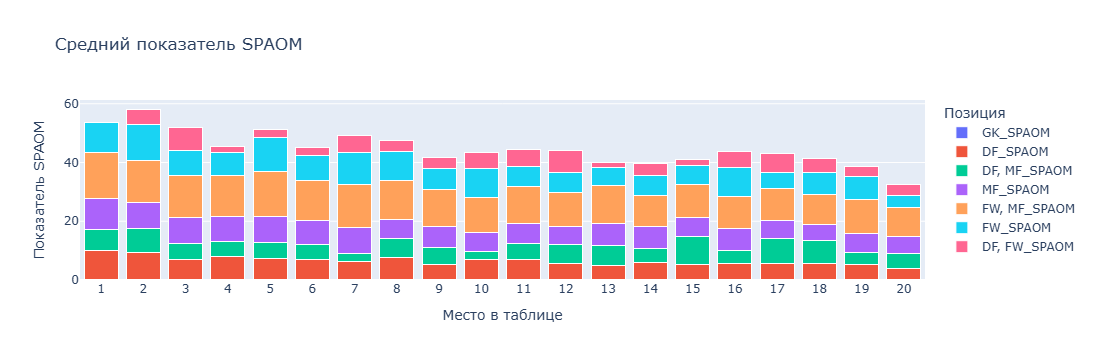

In [111]:
custom_order = ['GK_SPAOM', 'DF_SPAOM', 'DF, MF_SPAOM', 'MF_SPAOM', 'FW, MF_SPAOM', 'FW_SPAOM', 'DF, FW_SPAOM']
position_cols = [col for col in custom_order if col in data_teams.columns]
agg_df_SPAOM = data_teams.groupby('Rank')[position_cols].mean().reset_index()
melted_df = pd.melt(
    agg_df_SPAOM, 
    id_vars='Rank', 
    value_vars=position_cols, 
    var_name='Position', 
    value_name='Percentage'
)
melted_df['Position'] = pd.Categorical(
    melted_df['Position'], 
    categories=custom_order, 
    ordered=True
)
melted_df = melted_df.sort_values(['Rank', 'Position'])
melted_df = melted_df.sort_values('Rank')
fig = px.bar(
    melted_df,
    x='Rank',
    y='Percentage',
    color='Position',
    title='–°—Ä–µ–¥–Ω–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å SPAOM',
    labels={'Rank': '–ú–µ—Å—Ç–æ', 'Percentage': '–î–æ–ª—è –≥–æ–ª–æ–≤ (%)'},
    category_orders={
        "Position": custom_order,
        "Rank": sorted(melted_df['Rank'].unique())
    },
    barmode='stack'
)
fig.update_xaxes(
    type='category',
    title_text='–ú–µ—Å—Ç–æ –≤ —Ç–∞–±–ª–∏—Ü–µ',
    categoryorder='array',
    categoryarray=sorted(melted_df['Rank'].unique())
)
fig.update_yaxes(title_text='–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å SPAOM')
fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(
    legend_title='–ü–æ–∑–∏—Ü–∏—è',
    legend_traceorder='normal',
    xaxis={'tickmode': 'linear'}
)

fig.show()

In [ ]:
# (–ø–æ—Å–ª–∞–Ω–∏–µ) –°–¥–µ–ª–∞–π –≤—ã–≤–æ–¥ —Å –ø–æ–º–æ—â—å—é —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤. –ì—Ä–∞—Ñ–∏–∫ –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π, –ø–æ—ç—Ç–æ–º—É —Ç—ã –º–æ–∂–µ—à—å –≤–∫–ª—é—á–∞—Ç—å –∏ –æ—Ç–∫–ª—é—á–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ GK_SPAOM 
# –∏ DF,FW_SPAOM –Ω–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–π. –í–æ –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –Ω–∏—Å—Ö–æ–¥—è—â–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è, –æ–ø—Ä–µ–¥–µ–ª–∏ –≥–¥–µ —É–≥–æ–ª –Ω–∞–∫–ª–æ–Ω–∞ –±–æ–ª—å—à–µ - —Ç–∞–º –ø–∞—Ä–∞–º–µ—Ç—Ä
# –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–π. (—Å—É–¥—è –ø–æ –≤—Å–µ–º—É —ç—Ç–æ DF –≤—Å—ë-—Ç–∞–∫–∏)

In [112]:
agg_df.head()

Rank  GK_Percentage  DF_Percentage  DF, MF_Percentage  MF_Percentage  \
0     1            0.0       0.180577           0.053046       0.197016   
1     2            0.0       0.123727           0.026786       0.128886   
2     3            0.0       0.146623           0.013173       0.184142   
3     4            0.0       0.120973           0.041270       0.146714   
4     5            0.0       0.158919           0.006061       0.146867   

   FW, MF_Percentage  FW_Percentage  DF, FW_Percentage  
0           0.204436       0.364925           0.000000  
1           0.328076       0.389400           0.003125  
2           0.181828       0.463474           0.010761  
3           0.301417       0.385460           0.004167  
4           0.245396       0.442758           0.000000

In [113]:
positions = ['FW_SPAOM', 'MF_SPAOM', 'DF_SPAOM']
results = {}

X = np.array(agg_df_SPAOM['Rank'])
n = len(X)
X_mean = np.mean(X)
Sxx = np.sum((X - X_mean)**2)

for pos in positions:
    Y = np.array(agg_df_SPAOM[pos])
    Y_mean = np.mean(Y)
    Syy = np.sum((Y - Y_mean)**2)
    Sxy = np.sum((X - X_mean) * (Y - Y_mean))
    
    slope = Sxy / Sxx
    intercept = Y_mean - slope * X_mean
    r = Sxy / np.sqrt(Sxx * Syy)
    
    t_stat = r * np.sqrt((n - 2) / (1 - r**2))
    df = n - 2
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))
    
    results[pos] = {
        'slope': slope,
        'intercept': intercept,
        'r': r,
        'p_value': p_value
    }

    print(f"\n–†—É—á–Ω—ã–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è {pos}:")
    print(f"–°—Ä–µ–¥–Ω–∏–µ: XÃÑ={X_mean:.4f}, YÃÑ={Y_mean:.4f}")
    print(f"Sxy={Sxy:.4f}, Sxx={Sxx:.4f}, Syy={Syy:.4f}")
    print(f"slope={slope:.4f}, intercept={intercept:.4f}")
    print(f"r={r:.4f}")
    print(f"t-stat={t_stat:.4f}, p-value={p_value:.4f}")
    
    if round(slope,1) < 0 and p_value < 0.05:
        print(f"‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –¥–ª—è {pos}: —á–µ–º —Å–∏–ª—å–Ω–µ–µ –∫–æ–º–∞–Ω–¥–∞, —Ç–µ–º –±–æ–ª—å—à–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç SPAOM.")
    else:
        print(f"‚ùå –ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –¥–ª—è {pos}: —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç.")

strongest_pos = max(results, key=lambda x: abs(results[x]['r']))
print(f"\n –ù–∞–∏–±–æ–ª—å—à–∞—è —Å–∏–ª–∞ —Å–≤—è–∑–∏ (–ø–æ |r|) –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —É: {strongest_pos} —Å r={results[strongest_pos]['r']:.4f}")


–†—É—á–Ω—ã–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è FW_SPAOM:
–°—Ä–µ–¥–Ω–∏–µ: XÃÑ=10.5000, YÃÑ=8.2512
Sxy=-161.9068, Sxx=665.0000, Syy=85.8243
slope=-0.2435, intercept=10.8077
r=-0.6777
t-stat=-3.9103, p-value=0.0010
‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –¥–ª—è FW_SPAOM: —á–µ–º —Å–∏–ª—å–Ω–µ–µ –∫–æ–º–∞–Ω–¥–∞, —Ç–µ–º –±–æ–ª—å—à–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç SPAOM.

–†—É—á–Ω—ã–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è MF_SPAOM:
–°—Ä–µ–¥–Ω–∏–µ: XÃÑ=10.5000, YÃÑ=7.4150
Sxy=-121.0158, Sxx=665.0000, Syy=32.3260
slope=-0.1820, intercept=9.3258
r=-0.8254
t-stat=-6.2026, p-value=0.0000
‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –¥–ª—è MF_SPAOM: —á–µ–º —Å–∏–ª—å–Ω–µ–µ –∫–æ–º–∞–Ω–¥–∞, —Ç–µ–º –±–æ–ª—å—à–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç SPAOM.

–†—É—á–Ω—ã–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è DF_SPAOM:
–°—Ä–µ–¥–Ω–∏–µ: XÃÑ=10.5000, YÃÑ=6.4743
Sxy=-144.5650, Sxx=665.0000, Syy=42.8472
slope=-0.2174, intercept=8.7569
r=-0.8564
t-stat=-7.0381, p-value=0.0000
‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –¥–ª—è DF_SPAOM: —á–µ

In [ ]:
# –í—ã–≤–æ–¥: –Ω–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä SPAOM –Ω—É–∂–Ω–æ –æ–ø–∏—Ä–∞—Ç—å—Å—è –ø—Ä–∏ –≤—ã–±–æ—Ä–µ [–ø–æ–∑–∏—Ü–∏—è]